# Data Generation for Apps & Tzakiris, 2013
## The following script generates a totally new sequence of stimuli reasonable well approximating the data extracted from Apps & Tzakiris (2013) which can be used for additional experiments with the face-ID task.

## The total runtime is around 15 min with the current configuration.

In [1]:
### Import dependencies
from skopt import plots
from skopt import gp_minimize, utils, space
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as itt


In [2]:
### Import datagen functions

# This function will generate a list of 0,1 where 1==new ID as best corresponding to figure 1 bottom_right
from trialgen import find_sample

# This function will generate a list of facial IDs (1->24) with prior presentations
# as best as possible corresponding to figure 1 bottom_left
from trialgen import find_trial_list_189


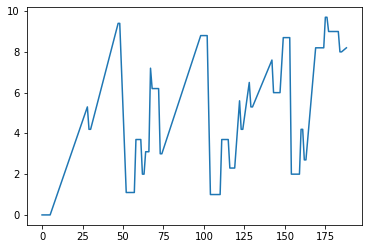

In [3]:
### Import transcribed data from figure 1 bottom_left
data_raw_fig1_c_l = np.array(pd.read_csv(r'Fig_1_c_left\transcribed_raw_FIG_1_c_L.csv')['0'])
# define rolling average window
window_fig1_c_l = 5
# Shows the average number of previous presentations of a facial ID over the experiment over
# a rolling avg window = 10

sns.lineplot(data=data_raw_fig1_c_l)

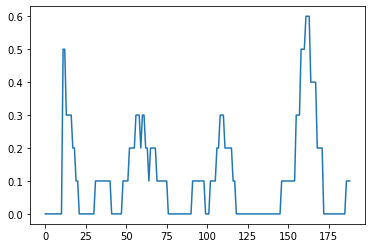

In [4]:
### Import transcribed data from figure 1 bottom_right
data_raw_fig1_c_r = np.array(pd.read_csv(r'Fig_1_c_right\Fig_1_c_right.csv')['0'])
# define rolling average window
window_fig1_c_r = 10
# Shows the percentage of new facial IDs over the experiment over a rolling avg window = 5
# 
sns.lineplot(data=data_raw_fig1_c_r)

In [5]:
### Modify transcribed data
data_fig1_c_r1 = data_raw_fig1_c_r.copy()
data_fig1_c_r1[0:2] = 0.999

data_fig1_c_r = list(data_fig1_c_r1) + [0 for i in range(189-len(data_fig1_c_r1))]

In [ ]:
### Find suitable approximation to figure 1 bottom_right
# 500000 iterations gives reasonable results
iterations = int(2e6)
res_2 = find_sample(data_fig1_c_r, iterations, data_raw_fig1_c_r) # generated list when a new face is introduced


## Below, the original transcribed data from the paper (blue) is compared with the newly generated data (yellow). The figure below is an approximation of figure 1 c_r of the publication.

In [ ]:
plot = sns.lineplot(data=data_raw_fig1_c_r)
plot = sns.lineplot(data=res_2[2])
plot.set_title('MSE ' + str(np.around(res_2[1],decimals=2)) + ' after ' + str(iterations) + ' iterations')
plot.set_ylabel('prob of new faces over rolling avg of 10')
# new_face == no prior presentation in the experiment
plot.set_xlabel('trials')

In [ ]:
result = find_trial_list_189(res_2[0], data_raw_fig1_c_l, 1000)

## Again, below the original transcribed data from the paper (blue) is compared with the newly generated data (yellow). The figure below is an approximation of figure 1c l of the publication.

In [ ]:
plot1 = sns.lineplot(data=data_raw_fig1_c_l)
plot1 = sns.lineplot(data=np.array(result[4]))
plot1.set_title('MSE' + str(res_2[1]))
plot1.set_ylabel('proportion of new faces over rolling avg of 10')
plot1.set_xlabel('trials')